### 주의 : 본 코드는 책에 대한 학습 및 교육외에 배포를 금지합니다. 
### Warning: This code is prohibited from distribution except for learning and educational purposes related to the book.
1장 인공지능과 화학의 만남
- by Keunhong Jeong 

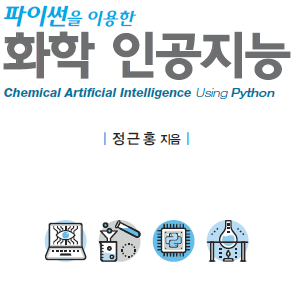

In [ ]:
# 변수 선언
x = 10   # 정수형 변수
y = 2.5  # 부동소수점형 변수
z = "Hello" # 문자열형 변수

In [ ]:
# 리스트
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne']

# 튜플
water = ('H', 'H', 'O')

# 사전
atomic_number = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10}


In [ ]:
# 조건문
if atomic_number['O'] > 2:
    print('Oxygen has more than 2 protons.')

# 반복문
for element in elements:
    print(element)


In [ ]:
# 함수 정의
def print_atomic_number(element):
    print(f'The atomic number of {element} is {atomic_number[element]}.')

# 함수 호출
print_atomic_number('O')


In [ ]:
import numpy as np

# Numpy 배열 생성
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 배열 덧셈
c = a + b
print(c)  # 출력: array([5, 7, 9])


In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'Element': ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'],
    'Atomic Weight': [1.008, 4.0026, 6.94, 9.0122, 10.81, 12.011, 14.007, 15.999, 18.998, 20.180]
})

print(df)


In [ ]:
import matplotlib.pyplot as plt

# 데이터 시각화
plt.plot(df['Element'], df['Atomic Weight'])
plt.xlabel('Element')
plt.ylabel('Atomic Weight')
plt.show()


In [ ]:
!pip install rdkit==2023.3.1

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# 분자 SMILES 표기법으로 생성
smiles = "CCO"

# SMILES를 RDKit 분자 객체로 변환
mol = Chem.MolFromSmiles(smiles)

# 분자 구조를 2D로 그리기
img = Draw.MolToImage(mol)

# 이미지 출력
img.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# 분자 SMILES 표기법으로 생성
smiles = "CCO"

# SMILES를 RDKit 분자 객체로 변환
mol = Chem.MolFromSmiles(smiles)

# 분자의 분자량 계산
mw = Descriptors.MolWt(mol)

# 분자의 분배계수,logp 값 계산
logp = Descriptors.MolLogP(mol)

print("분자량:", mw)
print("분배계수 값:", logp)

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# 분자 이름과 SMILES 리스트 생성
molecules = [
    ('Water', 'O'),
    ('Methane', 'C'),
    ('Ethanol', 'CCO'),
    ('Benzene', 'c1ccccc1'),
    ('Aspirin', 'CC(=O)Oc1ccccc1C(=O)O'),
    ('Caffeine', 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'),
    ('Acetaminophen', 'CC(=O)Nc1ccc(O)cc1'),
    ('Vitamin C', 'C(C(=O)O)C(=O)O'),
    ('Paracetamol', 'CC(=O)NC1=CC=C(C=C1)O'),
    ('Ibuprofen', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
]

# 분자와 SMILES 정보를 DataFrame으로 저장
df = pd.DataFrame(molecules, columns=['Molecule', 'SMILES'])

# DataFrame을 CSV 파일로 저장
df.to_csv('RDKIT.csv', index=False)

# 저장된 CSV 파일 로딩
loaded_df = pd.read_csv('RDKIT.csv')

# 다시 로딩된 DataFrame에서 분배계수(logP) 계산
loaded_logp_values = []
for smiles in loaded_df['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    logp = Descriptors.MolLogP(mol)
    loaded_logp_values.append(logp)

# 로딩된 DataFrame에 분배계수(logP) 값 추가
loaded_df['logP'] = loaded_logp_values

# 로딩된 DataFrame을 CSV 파일로 저장
loaded_df.to_csv('RDKIT_logP.csv', index=False)


In [ ]:
ls

In [ ]:
molecule_count = len(df)
print("분자의 수:", molecule_count)


In [ ]:
for index, row in loaded_df.iterrows():
    molecule_name = row['Molecule']
    logp_value = row['logP']
    print(f"{molecule_name}: {logp_value}")

In [ ]:
max_logp_molecule = loaded_df.loc[loaded_df['logP'].idxmax(), 'Molecule']
print("분배계수(logP) 값이 가장 높은 분자:", max_logp_molecule)

In [ ]:
smiles_input = input("분자의 SMILES 정보를 입력하세요: ")
mol = Chem.MolFromSmiles(smiles_input)
logp = Descriptors.MolLogP(mol)
print("분배계수(logP) 값:", logp)


In [ ]:
filtered_df = loaded_df[(loaded_df['logP'] <= 2) & (loaded_df['logP'] > 0)]
for index, row in filtered_df.iterrows():
    molecule_name = row['Molecule']
    logp_value = row['logP']
    print(f"{molecule_name}: {logp_value}")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# 분자의 SMILES 문자열로부터 RDKit 분자 객체 생성
smiles = 'CCO'  # 예시: 에탄올
mol = Chem.MolFromSmiles(smiles)

# 수소 원자를 추가
mol = Chem.AddHs(mol)

# 분자의 3D 구조를 생성
AllChem.EmbedMolecule(mol)

# UFF 힘장을 사용하여 분자의 3D 구조를 최적화
AllChem.UFFOptimizeMolecule(mol)

# 3D 구조 시각화
img = Draw.MolToImage(mol)

# 이미지 출력
img.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# 분자의 SMILES 문자열로부터 RDKit 분자 객체 생성
smiles = 'CCCO'  # 예시: 프로판올
mol = Chem.MolFromSmiles(smiles)

# 수소 원자를 추가
mol = Chem.AddHs(mol)

# 분자의 3D 구조를 생성
AllChem.EmbedMolecule(mol)

# UFF 힘장을 사용하여 분자의 3D 구조를 최적화
AllChem.UFFOptimizeMolecule(mol)

# MOL 파일 형식으로 저장
Chem.MolToMolFile(mol, "propanol.mol")

In [ ]:
ls

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

# 분자 SMILES와 분배계수(logP) 값 리스트 생성
molecules = [
    ("Water", "O"),
    ("Methane", "C"),
    ("Ethanol", "CCO"),
    ("Benzene", "c1ccccc1"),
    ("Aspirin", "CC(=O)Oc1ccccc1C(=O)O"),
    ("Caffeine", "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"),
    ("Acetaminophen", "CC(=O)Nc1ccc(O)cc1"),
    ("Vitamin C", "C(C(=O)O)C(=O)O"),
    ("Paracetamol", "CC(=O)NC1=CC=C(C=C1)O"),
    ("Ibuprofen", "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O")
]

# 분자와 분배계수(logP) 값을 DataFrame으로 저장
df = pd.DataFrame(molecules, columns=["Molecule", "SMILES"])
logp_values = []
for smiles in df["SMILES"]:
    mol = Chem.MolFromSmiles(smiles)
    logp = Descriptors.MolLogP(mol)
    logp_values.append(logp)
df["logP"] = logp_values

# 분배계수(logP) 값을 색으로 나타내는 분자 속성 시각화
fig, ax = plt.subplots()
scatter = ax.scatter(range(len(df)), df["logP"], c=df["logP"], cmap="coolwarm")
cbar = plt.colorbar(scatter)
cbar.set_label("logP")
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df["Molecule"], rotation=45, ha="right")
ax.set_xlim(-0.5, len(df) - 0.5)
ax.set_ylabel("logP")
plt.tight_layout()
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem

# 분자 SMILES 표기법으로 생성
smiles1 = "CCO"
smiles2 = "CC(C)O"

# SMILES를 RDKit 분자 객체로 변환
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# 분자의 지문 (fingerprint) 생성
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

# 화학적 유사도 계산
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

# 계산된 유사도 출력
print("화학적 유사도:", similarity)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# SMILES 문자열
smiles_string = "CCO" # 예: 에탄올

# SMILES를 분자로 변환
mol = Chem.MolFromSmiles(smiles_string)

# 3D 좌표 생성
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# InChI로 변환
inchi = Chem.MolToInchi(mol)
print("InChI:")
print(inchi)

# InChIKey로 변환
inchi_key = Chem.MolToInchiKey(mol)
print("InChIKey:")
print(inchi_key)

# SMARTS로 변환
smarts = Chem.MolToSmarts(mol)
print("SMARTS:")
print(smarts)

# SDF 형식으로 출력
sdf_block = Chem.MolToMolBlock(mol)
print("SDF 형식:")
print(sdf_block)

# MOL 형식으로 출력 (스테레오 정보 포함)
mol_block_with_stereo = Chem.MolToMolBlock(mol, includeStereo=True)
print("MOL 형식 (스테레오 정보 포함):")
print(mol_block_with_stereo)

# PDB 형식으로 출력
pdb_block = Chem.MolToPDBBlock(mol)
print("PDB 형식:")
print(pdb_block)

# XYZ 형식으로 출력
xyz_block = Chem.MolToXYZBlock(mol)
print("XYZ 형식:")
print(xyz_block)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdMolDescriptors, rdchem
from rdkit.Avalon import pyAvalonTools as avalon

# 카페인 분자 구조 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# Morgan Fingerprint (비트 벡터 형태)
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, radius=2, nBits=1024)

# ECFP6 Fingerprint
ecfp6_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, radius=3, nBits=1024)

# MACCS keys
maccs_fp = MACCSkeys.GenMACCSKeys(caffeine)

# Molecular Quantum Numbers
mqn = rdMolDescriptors.MQNs_(caffeine)

# Topological Fingerprint
topo_fp = Chem.RDKFingerprint(caffeine)

# Avalon Fingerprint
avalon_fp = avalon.GetAvalonFP(caffeine)

# Pattern Fingerprint
pattern_fp = AllChem.LayeredFingerprint(caffeine)

print(f"Morgan Fingerprint: {morgan_fp.ToBitString()}")
print(f"ECFP6 Fingerprint: {ecfp6_fp.ToBitString()}")
print(f"MACCS keys: {maccs_fp.ToBitString()}")
print(f"Molecular Quantum Numbers: {mqn}")
print(f"Topological Fingerprint: {topo_fp}")
print(f"Avalon Fingerprint: {avalon_fp}")
print(f"Pattern Fingerprint: {pattern_fp}")



In [ ]:
pattern_fp.ToBitString()

In [ ]:
import csv
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# 카페인 분자 구조 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# Molecular Quantum Numbers (MQN) 계산
mqn = rdMolDescriptors.MQNs_(caffeine)

# MQN 이름
mqn_names = ['Total atoms', 'Total bonds', 'Single bonds', 'Double bonds', 
             'Triple bonds', 'Aromatic bonds', '3-membered rings', 
             '4-membered rings', '5-membered rings', '6-membered rings',
             'O atoms', 'N atoms', 'C atoms', 'S atoms', 'P atoms', 
             'F atoms', 'Cl atoms', 'Br atoms', '3-membered carbocycles',
             '4-membered carbocycles', '5-membered carbocycles', 
             '3-membered heterocycles', '4-membered heterocycles',
             '5-membered heterocycles', 'Aromatic atoms', 'Aromatic bonds', 
             'Aromatic carbocycles', 'Aromatic heterocycles', 
             '5-membered aromatic rings', '6-membered aromatic rings',
             'Aliphatic atoms', 'Aliphatic bonds', 'Aliphatic carbocycles', 
             'Aliphatic heterocycles', '3-membered aliphatic rings', 
             '4-membered aliphatic rings', 'C=C cis-trans isomerism', 
             'C=N cis-trans isomerism', 'Chiral centres', 
             'R/S chiral centres', 'M/P chiral centres', 
             'Undefined chiral centres']

# CSV 파일로 저장
with open('caffeine_mqn.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(mqn_names)  # CSV header
    writer.writerow(mqn)  # MQN values


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

# 카페인 분자 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# 1D 디스크립터
mol_weight = Descriptors.MolWt(caffeine)
num_atoms = caffeine.GetNumAtoms()
num_heavy_atoms = caffeine.GetNumHeavyAtoms()
num_valence_electrons = Descriptors.NumValenceElectrons(caffeine)
num_heteroatoms = Descriptors.NumHeteroatoms(caffeine)

# 2D 디스크립터
maccs_keys = rdMolDescriptors.GetMACCSKeysFingerprint(caffeine)
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, radius=2, nBits=1024)
topological_fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(caffeine)
atompair_fp = rdMolDescriptors.GetAtomPairFingerprint(caffeine)
torsional_fp = rdMolDescriptors.GetTopologicalTorsionFingerprint(caffeine)

# 3D 디스크립터
# 3D 좌표를 계산하기 위해 분자를 3D로 변환
AllChem.EmbedMolecule(caffeine)
AllChem.UFFOptimizeMolecule(caffeine)
tpsa = Descriptors.TPSA(caffeine)
eccentricity = rdMolDescriptors.Eccentricity(caffeine)
inertial_shape_factor = rdMolDescriptors.InertialShapeFactor(caffeine)
radius_of_gyration = rdMolDescriptors.RadiusOfGyration(caffeine)
spherocity_index = rdMolDescriptors.SpherocityIndex(caffeine)

print(f"Molecular Weight: {mol_weight}")
print(f"Number of Atoms: {num_atoms}")
print(f"Number of Heavy Atoms: {num_heavy_atoms}")
print(f"Number of Valence Electrons: {num_valence_electrons}")
print(f"Number of Heteroatoms: {num_heteroatoms}")

print(f"MACCS Keys: {maccs_keys.ToBitString()}")
print(f"Morgan Fingerprint: {morgan_fp.ToBitString()}")
print(f"Topological Fingerprint: {topological_fp.ToBitString()}")
print(f"AtomPair Fingerprint: {atompair_fp.GetNonzeroElements()}")
print(f"Torsional Fingerprint: {torsional_fp.GetNonzeroElements()}")

print(f"Topological Polar Surface Area (TPSA): {tpsa}")
print(f"Eccentricity: {eccentricity}")
print(f"Inertial Shape Factor: {inertial_shape_factor}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Spherocity Index: {spherocity_index}")



In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
import py3Dmol

# 카페인 분자 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# 1D 디스크립터
mol_weight = Descriptors.MolWt(caffeine)
num_atoms = caffeine.GetNumAtoms()
num_heavy_atoms = caffeine.GetNumHeavyAtoms()
num_valence_electrons = Descriptors.NumValenceElectrons(caffeine)
num_heteroatoms = Descriptors.NumHeteroatoms(caffeine)

# 2D 디스크립터
maccs_keys = rdMolDescriptors.GetMACCSKeysFingerprint(caffeine)
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, radius=2, nBits=1024)
topological_fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(caffeine)
atompair_fp = rdMolDescriptors.GetAtomPairFingerprint(caffeine)
torsional_fp = rdMolDescriptors.GetTopologicalTorsionFingerprint(caffeine)

# 3D 디스크립터
# 3D 좌표를 계산하기 위해 분자를 3D로 변환
Chem.AddHs(caffeine)
AllChem.EmbedMolecule(caffeine)
AllChem.UFFOptimizeMolecule(caffeine)

# Py3Dmol을 사용하여 3D 분자를 시각화
view = py3Dmol.view(width=400, height=300)
view.addModel(Chem.MolToMolBlock(caffeine), 'sdf')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

tpsa = Descriptors.TPSA(caffeine)  
labute_asa = rdMolDescriptors.CalcLabuteASA(caffeine) 
pme_ed = rdMolDescriptors.CalcPMI1(caffeine)  
pme_ed_ratio = rdMolDescriptors.CalcPMI2(caffeine)  
pme_id_ratio = rdMolDescriptors.CalcPMI3(caffeine) 

print(f"Molecular Weight: {mol_weight}")
print(f"Number of Atoms: {num_atoms}")
print(f"Number of Heavy Atoms: {num_heavy_atoms}")
print(f"Number of Valence Electrons: {num_valence_electrons}")
print(f"Number of Heteroatoms: {num_heteroatoms}")

print(f"MACCS Keys: {maccs_keys.ToBitString()}")
print(f"Morgan Fingerprint: {morgan_fp.ToBitString()}")
print(f"Topological Fingerprint: {topological_fp.ToBitString()}")
print(f"AtomPair Fingerprint: {atompair_fp.GetNonzeroElements()}")
print(f"Torsional Fingerprint: {torsional_fp.GetNonzeroElements()}")

print(f"Topological Polar Surface Area (TPSA): {tpsa}")
print(f"Labute's Approximate Surface Area: {labute_asa}")
print(f"Principal moments of inertia: First eigenvalue: {pme_ed}")
print(f"Ratio of second to first eigenvalue (PMI2): {pme_ed_ratio}")
print(f"Ratio of third (smallest) to first eigenvalue (PMI3): {pme_id_ratio}")



In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors


# 카페인 분자 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine = Chem.AddHs(caffeine)
AllChem.EmbedMolecule(caffeine)
AllChem.UFFOptimizeMolecule(caffeine)

# 1D 디스크립터
mol_weight = Descriptors.MolWt(caffeine)
num_atoms = caffeine.GetNumAtoms()
num_heavy_atoms = caffeine.GetNumHeavyAtoms()
num_valence_electrons = Descriptors.NumValenceElectrons(caffeine)
num_heteroatoms = Descriptors.NumHeteroatoms(caffeine)

# 2D 디스크립터
maccs_keys = rdMolDescriptors.GetMACCSKeysFingerprint(caffeine)
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, radius=2, nBits=1024)
topological_fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(caffeine)
atompair_fp = rdMolDescriptors.GetAtomPairFingerprint(caffeine)
torsional_fp = rdMolDescriptors.GetTopologicalTorsionFingerprint(caffeine)

# 3D 디스크립터
tpsa = Descriptors.TPSA(caffeine)  
labute_asa = rdMolDescriptors.CalcLabuteASA(caffeine) 
pme_ed = rdMolDescriptors.CalcPMI1(caffeine) 
pme_ed_ratio = rdMolDescriptors.CalcPMI2(caffeine)  
pme_id_ratio = rdMolDescriptors.CalcPMI3(caffeine)  

print(f"Molecular Weight: {mol_weight}")
print(f"Number of Atoms: {num_atoms}")
print(f"Number of Heavy Atoms: {num_heavy_atoms}")
print(f"Number of Valence Electrons: {num_valence_electrons}")
print(f"Number of Heteroatoms: {num_heteroatoms}")

print(f"MACCS Keys: {maccs_keys.ToBitString()}")
print(f"Morgan Fingerprint: {morgan_fp.ToBitString()}")
print(f"Topological Fingerprint: {topological_fp.ToBitString()}")
print(f"AtomPair Fingerprint: {atompair_fp.GetNonzeroElements()}")
print(f"Torsional Fingerprint: {torsional_fp.GetNonzeroElements()}")

print(f"Topological Polar Surface Area (TPSA): {tpsa}")
print(f"Labute's Approximate Surface Area: {labute_asa}")
print(f"Principal moments of inertia: First eigenvalue: {pme_ed}")
print(f"Ratio of second to first eigenvalue (PMI2): {pme_ed_ratio}")
print(f"Ratio of third (smallest) to first eigenvalue (PMI3): {pme_id_ratio}")


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

# 카페인 분자 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# 수소 추가
caffeine = Chem.AddHs(caffeine)

# 분자의 3D 좌표 생성
AllChem.EmbedMolecule(caffeine)

# 분자의 3D 좌표 최적화
AllChem.UFFOptimizeMolecule(caffeine)

# 1D 디스크립터 계산
mol_weight = Descriptors.MolWt(caffeine)  # 분자량
num_atoms = caffeine.GetNumAtoms()  # 원자 수
num_heavy_atoms = caffeine.GetNumHeavyAtoms()  # 중성 원자 수
num_valence_electrons = Descriptors.NumValenceElectrons(caffeine)  # 가용 전자 수
num_heteroatoms = Descriptors.NumHeteroatoms(caffeine)  # 이성원자 수

# 3D 디스크립터 계산
tpsa = Descriptors.TPSA(caffeine)  # Topological Polar Surface Area
labute_asa = rdMolDescriptors.CalcLabuteASA(caffeine)  # Labute의 근사 표면적
pme_ed = rdMolDescriptors.CalcPMI1(caffeine)  # 주요 관성 모멘트: 첫 번째 고유값
pme_ed_ratio = rdMolDescriptors.CalcPMI2(caffeine)  # 두 번째와 첫 번째 고유값의 비율
pme_id_ratio = rdMolDescriptors.CalcPMI3(caffeine)  # 세 번째(가장 작은)와 첫 번째 고유값의 비율

# 계산된 디스크립터 출력
print(f"Molecular Weight: {mol_weight}")
print(f"Number of Atoms: {num_atoms}")
print(f"Number of Heavy Atoms: {num_heavy_atoms}")
print(f"Number of Valence Electrons: {num_valence_electrons}")
print(f"Number of Heteroatoms: {num_heteroatoms}")

print(f"Topological Polar Surface Area (TPSA): {tpsa}")
print(f"Labute's Approximate Surface Area: {labute_asa}")
print(f"Principal moments of inertia: First eigenvalue: {pme_ed}")
print(f"Ratio of second to first eigenvalue (PMI2): {pme_ed_ratio}")
print(f"Ratio of third (smallest) to first eigenvalue (PMI3): {pme_id_ratio}")


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# 카페인의 SMILES 표기법
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

# SMILES를 RDKit 분자 객체로 변환
mol = Chem.MolFromSmiles(smiles)

# 디스크립터 계산
descriptor_values = []
for desc in Descriptors.descList:
    try:
        value = desc[1](mol)
    except:
        value = None
    descriptor_values.append((desc[0], value))

# 결과를 데이터프레임으로 변환
df = pd.DataFrame(descriptor_values, columns=["Descriptor", "Value"])

# 결과 저장
df.to_csv("descList.csv", index=False)

---


In [ ]:
!pip install mordred
!pip install rdkit==2023.3.1
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors

# 카페인 분자 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# 3D 좌표 계산
caffeine = Chem.AddHs(caffeine)
AllChem.EmbedMolecule(caffeine)
AllChem.MMFFOptimizeMolecule(caffeine)
caffeine = Chem.RemoveHs(caffeine)

# 모든 가능한 디스크립터를 계산하기 위한 계산기 생성
calc = Calculator(descriptors, ignore_3D=False)

# 디스크립터 계산
desc_values = calc(caffeine)

# 결과 출력
print(desc_values)


In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem

# 분자 SMILES 표기법으로 생성
smiles1 = "CCO"
smiles2 = "CC(C)O"

# SMILES를 RDKit 분자 객체로 변환
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# 분자의 지문 (fingerprint) 생성
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

# 화학적 유사도 계산
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

# 계산된 유사도 출력
print("화학적 유사도:", similarity)

In [ ]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem

# 두 분자의 SMILES
smiles1 = "CC(=O)OC1=CC=CC=C1C(=O)O"
smiles2 = "CC(=O)O"

# 분자 객체 생성
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# 분자 지문 생성
fp1 = FingerprintMols.FingerprintMol(mol1)
fp2 = FingerprintMols.FingerprintMol(mol2)

# Tanimoto 유사성 계산
tanimoto_sim = DataStructs.FingerprintSimilarity(fp1, fp2)
print(f"Tanimoto Similarity: {tanimoto_sim}")

# Dice 계수 계산
dice_sim = DataStructs.DiceSimilarity(fp1, fp2)
print(f"Dice Similarity: {dice_sim}")


In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs

# 두 분자 정의
mol1 = Chem.MolFromSmiles('CCCO')
mol2 = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')

# Morgan Fingerprint
fp1 = rdFingerprintGenerator.GetMorganGenerator(radius=2).GetFingerprint(mol1)
fp2 = rdFingerprintGenerator.GetMorganGenerator(radius=2).GetFingerprint(mol2)
print("Morgan Fingerprint")
print("Tanimoto Similarity: ", DataStructs.TanimotoSimilarity(fp1, fp2))
print("Dice Similarity: ", DataStructs.DiceSimilarity(fp1, fp2))

# RDKit Fingerprint
fp1 = rdFingerprintGenerator.GetRDKitFPGenerator().GetFingerprint(mol1)
fp2 = rdFingerprintGenerator.GetRDKitFPGenerator().GetFingerprint(mol2)
print("\nRDKit Fingerprint")
print("Tanimoto Similarity: ", DataStructs.TanimotoSimilarity(fp1, fp2))
print("Dice Similarity: ", DataStructs.DiceSimilarity(fp1, fp2))

# MACCS Keys
fp1 = rdMolDescriptors.GetMACCSKeysFingerprint(mol1)
fp2 = rdMolDescriptors.GetMACCSKeysFingerprint(mol2)
print("\nMACCS Keys Fingerprint")
print("Tanimoto Similarity: ", DataStructs.TanimotoSimilarity(fp1, fp2))
print("Dice Similarity: ", DataStructs.DiceSimilarity(fp1, fp2))


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_smiles = Chem.MolToSmiles(product[0])
        print("생성된 분자의 SMILES:", product_smiles)
else:
    print("반응 가능성: False")



In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdmolops  

# Reactant 1: 아민 구조
reactant1_smiles = "CC(C)N"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[NH2:1].[C:2](=[O:3])O>>[NH:1][C:2]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        rdmolops.SanitizeMol(product_mol)  # 추가
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolsToGridImage([product_mol], molsPerRow=1, subImgSize=(300, 300))
        display(img)
else:
    print("반응 가능성: False")


In [ ]:
import csv
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# 카페인 분자 구조 생성
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# Molecular Quantum Numbers (MQN) 계산
mqn = rdMolDescriptors.MQNs_(caffeine)

# MQN 이름
mqn_names = ['Total atoms', 'Total bonds', 'Single bonds', 'Double bonds', 
             'Triple bonds', 'Aromatic bonds', '3-membered rings', 
             '4-membered rings', '5-membered rings', '6-membered rings',
             'O atoms', 'N atoms', 'C atoms', 'S atoms', 'P atoms', 
             'F atoms', 'Cl atoms', 'Br atoms', '3-membered carbocycles',
             '4-membered carbocycles', '5-membered carbocycles', 
             '3-membered heterocycles', '4-membered heterocycles',
             '5-membered heterocycles', 'Aromatic atoms', 'Aromatic bonds', 
             'Aromatic carbocycles', 'Aromatic heterocycles', 
             '5-membered aromatic rings', '6-membered aromatic rings',
             'Aliphatic atoms', 'Aliphatic bonds', 'Aliphatic carbocycles', 
             'Aliphatic heterocycles', '3-membered aliphatic rings', 
             '4-membered aliphatic rings', 'C=C cis-trans isomerism', 
             'C=N cis-trans isomerism', 'Chiral centres', 
             'R/S chiral centres', 'M/P chiral centres', 
             'Undefined chiral centres']

# CSV 파일로 저장
with open('caffeine_mqn.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(mqn_names)  # CSV header
    writer.writerow(mqn)  # MQN values


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# 리액션을 진행할 분자들
substrate1 = Chem.MolFromSmiles("CC(=O)O")
substrate2 = Chem.MolFromSmiles("CCO")

# 반응 생성물의 분자 구조 생성
reaction_products = AllChem.ReactionFromSmarts("[OH:1][C:2](=[O:3])[C].[O:4][C:5]>>[O:1][C:2](=[O:3])[C:5][O:4]")

# 반응 예측
predicted_products = reaction_products.RunReactants([substrate1, substrate2])

# 예측된 반응 생성물의 분자 구조 그리기
img = Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(prod[0])) for prod in predicted_products], molsPerRow=3)

# 그림 파일로 저장
img.save("reaction_prediction.png")

# 예측된 반응 생성물 출력
for product in predicted_products:
    print(Chem.MolToSmiles(product[0]))


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# 리액션을 진행할 분자들
substrate1 = Chem.MolFromSmiles("CC(=O)O")
substrate2 = Chem.MolFromSmiles("CCCO")
substrate3 = Chem.MolFromSmiles("CO")
substrate4 = Chem.MolFromSmiles("CCO")

# 반응 생성물의 분자 구조 생성
#reaction_products = AllChem.ReactionFromSmarts("[OH:1][C:2](=[O:3])[C].[O:4][C:5].[O:6][C:7].[O:8][C:9]>>[O:1][C:2](=[O:3])[C:5][O:4].[O:6][C:7](=[O:8])[C:9]")
reaction_products = AllChem.ReactionFromSmarts("[OH:1][C:2](=[O:3])[C].[O:4][C:5]>>[O:1][C:2](=[O:3])[C:5][O:4]")
# 반응 예측
predicted_products = reaction_products.RunReactants([substrate1, substrate2, substrate3, substrate4])

# 예측된 반응 생성물의 분자 구조 그리기
mols = [Chem.MolFromSmiles(Chem.MolToSmiles(prod[0])) for prod in predicted_products]
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300))

# 이미지 표시
display(img)

# 예측된 반응 생성물 출력
for product in predicted_products:
    print(Chem.MolToSmiles(product[0]))




In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# 분자 SMILES 표기법으로 생성
smiles = "CCO"

# SMILES를 RDKit 분자 객체로 변환
mol = Chem.MolFromSmiles(smiles)

# 반응성 예측 (화학 반응 가능성)
reactivity = AllChem.GetMoleculeProperties(mol).HasReactionChemistry()
print("화학 반응 가능성:", reactivity)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define the reaction SMARTS pattern
reaction_smarts = "[OH:1][C:2](=[O:3])[OH]>>[O:3]=[C:2][C:1]=O"

# Create a reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the molecule matches the reaction SMARTS pattern
reactivity = reaction.RunReactants([mol])
if reactivity:
    print("화학 반응 가능성: True")
else:
    print("화학 반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_smiles = Chem.MolToSmiles(product[0])
        print("생성된 분자의 SMILES:", product_smiles)
else:
    print("반응 가능성: False")



In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCCCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CCC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_smiles = Chem.MolToSmiles(product[0])
        print("생성된 분자의 SMILES:", product_smiles)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for products in reactivity:
        for product in products:
            product_smiles = Chem.MolToSmiles(product)
            print("생성된 분자의 SMILES:", product_smiles)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    products = [prod for prod_set in reactivity for prod in prod_set]
    Draw.MolsToGridImage(products, molsPerRow=3, subImgSize=(300, 300))
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)
        # 2D 그림으로 분자 구조 표현
        product_mol = Chem.AddHs(product_mol)  # 수소 추가
        Chem.Compute2DCoords(product_mol)  # 2D 좌표 계산
        product_mol.SetProp("_Name", product_name)
        display(product_mol)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# 반응물에 대한 RDKit 분자 객체 생성
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# 반응 SMARTS 패턴 정의
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# SMARTS 패턴으로부터 반응 객체 생성
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# 반응물이 반응 SMARTS 패턴과 일치하는지 확인
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)
        # 2D 좌표 계산
        Chem.Compute2DCoords(product_mol)  # 2D 좌표 계산
        # 수소 추가
        product_mol = Chem.AddHs(product_mol)
        product_mol.SetProp("_Name", product_name)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolsToGridImage([product_mol], molsPerRow=1, subImgSize=(300, 300))
        display(img)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# Reactant 1: 알코올 구조
reactant1_smiles = "CCCO"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# 반응물에 대한 RDKit 분자 객체 생성
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# 반응 SMARTS 패턴 정의
reaction_smarts = "[OH:1].[C:2](=[O:3])O>>[O:3]=[C:2][C:1]=O"

# SMARTS 패턴으로부터 반응 객체 생성
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# 반응물이 반응 SMARTS 패턴과 일치하는지 확인
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
 #       img = Draw.MolsToGridImage([product_mol], molsPerRow=1, subImgSize=(300, 300))
        img = Draw.MolsToImage([product_mol])

        display(img)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# Reactant 1: 아민 구조
reactant1_smiles = "CC(C)N"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# 반응물에 대한 RDKit 분자 객체 생성
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# 반응 SMARTS 패턴 정의
reaction_smarts = "[NH2:1].[C:2](=[O:3])O>>[NH:1C](=[O:3])[C:2]=O"

# SMARTS 패턴으로부터 반응 객체 생성
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# 반응물이 반응 SMARTS 패턴과 일치하는지 확인
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolsToGridImage([product_mol], molsPerRow=1, subImgSize=(300, 300))
        display(img)
else:
    print("반응 가능성: False")



In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# Reactant 1: 아민 구조
reactant1_smiles = "CCC(C)N"

# Reactant 2: Acid 구조
reactant2_smiles = "CCC(=O)O"

# 반응물에 대한 RDKit 분자 객체 생성
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# 반응 SMARTS 패턴 정의
reaction_smarts = "[NH2:1].[C:2](=[O:3])O>>[NH:1][C:2]=O"

# SMARTS 패턴으로부터 반응 객체 생성
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# 반응물이 반응 SMARTS 패턴과 일치하는지 확인
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolsToImage([product_mol])
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# Reactant 1: 아민 구조
reactant1_smiles = "CC(C)N"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# 반응물에 대한 RDKit 분자 객체 생성
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# 반응 SMARTS 패턴 정의
reaction_smarts = "[NH2:1].[C:2](=[O:3])O>>[NH:1][C:2]=O"

# SMARTS 패턴으로부터 반응 객체 생성
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# 반응물이 반응 SMARTS 패턴과 일치하는지 확인
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolToImage([product_mol])
        display(img)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# RDKit 분자 객체 생성
mol = Chem.MolFromSmiles("CCO")

# 분자의 2D 이미지 생성
img = Draw.MolToImage(mol)
img.show()

# 분자 이미지를 파일로 저장
Draw.MolToFile(mol, "mol_image.png")

# 여러 분자의 그리드 이미지 생성
mols = [Chem.MolFromSmiles("CCO"), Chem.MolFromSmiles("CC(=O)O"), Chem.MolFromSmiles("C1=CC=CC=C1")]
grid_img = Draw.MolToImage(mols, molsPerRow=3, subImgSize=(200, 200))
grid_img.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# Reactant 1: 아민 구조
reactant1_smiles = "CC(C)N"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# Create RDKit molecule objects for reactants
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Define reaction SMARTS pattern
reaction_smarts = "[NH2:1].[C:2](=[O:3])O>>[NH:1][C:2]=O"

# Create reaction object from the SMARTS pattern
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reactants match the reaction SMARTS pattern
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolsToGridImage([product_mol], molsPerRow=1, subImgSize=(300, 300))
        display(img)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdmolops  # 추가

# Reactant 1: 아민 구조
reactant1_smiles = "CC(C)N"

# Reactant 2: Acid 구조
reactant2_smiles = "CC(=O)O"

# 반응물에 대한 RDKit 분자 객체 생성
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# 반응 SMARTS 패턴 정의
reaction_smarts = "[NH2:1].[C:2](=[O:3])O>>[NH:1][C:2]=O"

# SMARTS 패턴으로부터 반응 객체 생성
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# 반응물이 반응 SMARTS 패턴과 일치하는지 확인
reactivity = reaction.RunReactants([reactant1, reactant2])

if reactivity:
    print("반응 가능성: True")
    for product in reactivity:
        product_mol = product[0]
        rdmolops.SanitizeMol(product_mol)  # 추가
        product_smiles = Chem.MolToSmiles(product_mol)
        product_name = "Product"
        print("생성된 분자의 SMILES:", product_smiles)

        # 2D 그림으로 분자 구조 표현
        img = Draw.MolsToGridImage([product_mol], molsPerRow=1, subImgSize=(300, 300))
        display(img)
else:
    print("반응 가능성: False")


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# SMILES 문자열
smiles_string = "CCO"  # 에탄올

# SMILES 문자열을 분자로 변환
mol = Chem.MolFromSmiles(smiles_string)

# 3D 구조 생성
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

# Gaussian 입력 파일의 추가 설정
additional_input = (
    "%mem=1GB\n"  # 메모리 할당
    "%nproc=4\n"  # 프로세서 수
    "#p B3LYP/6-31G(d) opt\n"  # 계산 방법 및 기저 집합, 최적화 옵션
    "\n"
    "Title Card Required\n"  # 제목 카드
    "\n"
    "0 1"  # 차지 및 스핀 다중도
)

# 분자 정보를 Gaussian 입력 형식으로 변환
atom_block = ""
for atom in mol.GetAtoms():
    pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
    atom_block += "\n{:2} {:> 10.4f} {:> 10.4f} {:> 10.4f}\n".format(atom.GetSymbol(), pos.x, pos.y, pos.z)

# Gaussian 입력 파일 생성
gjf_string = additional_input + atom_block 
print(gjf_string)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# SMILES 문자열
smiles_string = "CCO"  # 에탄올

# SMILES 문자열을 분자로 변환
mol = Chem.MolFromSmiles(smiles_string)

# 3D 구조 생성
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

# Gaussian 입력 파일의 추가 설정
additional_input = (
    "%mem=1GB\n"  # 메모리 할당
    "%nproc=4\n"  # 프로세서 수
    "#p B3LYP/6-31G(d) opt\n"  # 계산 방법 및 기저 집합, 최적화 옵션
    "\n"
    "Title Card Required\n"  # 제목 카드
    "\n"
    "0 1"  # 차지 및 스핀 다중도
)

# 분자 정보를 Gaussian 입력 형식으로 변환
atom_block = ""
for atom in mol.GetAtoms():
    pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
    atom_block += "\n{:2} {:> 10.4f} {:> 10.4f} {:> 10.4f}\n".format(atom.GetSymbol(), pos.x, pos.y, pos.z)

# Gaussian 입력 파일 생성
gjf_string = additional_input + atom_block

# 파일로 출력
with open('test.gjf', 'w') as f:
    f.write(gjf_string)
